In [1]:
import librosa
import os
import pandas
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
wav, samplerate = librosa.load("audible_2048.wav")

In [3]:
wav.shape[0] / samplerate

24.531519274376418

In [4]:
wavs = []

for root, dirs, files in os.walk("."):
    for name in files:
        if name.endswith("wav"):
            profile, datasize = name.split(".")[0].split("_")
            filesize = os.path.getsize(name)
            wav, samplerate = librosa.load(name)
            
            info = (profile, datasize, filesize, samplerate, wav.shape[0])
            print(" ".join([str(i) for i in info]))
            wavs.append(info)

audible-7k-channel-1 2048 431696 22050 53952
audible-7k-channel-0 2048 431696 22050 53952
ultrasonic 16384 43396496 22050 5424552
audible 2048 4327440 22050 540920
audible-7k-channel-1 256 62096 22050 7752
audible-7k-channel-0 65536 13542992 22050 1692864
ultrasonic-3600 4096 1573792 22050 196714
audible 1024 2163920 22050 270480
cable-64k 4096 98064 22050 12248
audible-7k-channel-0 1024 215312 22050 26904
audible-7k-channel-1 1024 215312 22050 26904
ultrasonic-whisper 4096 31704080 22050 3963000
ultrasonic 4096 10864080 22050 1358000
ultrasonic 32768 86792912 22050 10849104
cable-64k 16384 382608 22050 47816
audible-7k-channel-1 32768 6771536 22050 846432
ultrasonic-whisper 128 991760 22050 123960
ultrasonic-whisper 512 3963920 22050 495480
ultrasonic 256 692240 22050 86520
audible-7k-channel-0 256 62096 22050 7752
audible-7k-channel-1 16384 3385808 22050 423216
audible 256 556880 22050 69600
cable-64k 32768 765136 22050 95632
ultrasonic-3600 512 197872 22050 24724
audible-7k-channel-

In [5]:
df = pandas.DataFrame(wavs, columns=["profile", "datasize", "filesize", "samplerate", "samples"])
df["datasize"] = pandas.to_numeric(df["datasize"])
df["filesize"] = pandas.to_numeric(df["filesize"])
df["samplerate"] = pandas.to_numeric(df["samplerate"])
df["samples"] = pandas.to_numeric(df["samples"])
df.sort_values(by=["profile", "datasize"])

df["duration"] = df["samples"] / df["samplerate"]
df["kbps"] = df["datasize"] / df["duration"] / 64
#df = df[df['datasize'] <= 2048]
df.set_index(["datasize"], inplace=True)
for d in df.groupby("profile"):
    print(d[0])
    display(d[1].sort_values(by=["datasize"]))

audible


,profile,filesize,samplerate,samples,duration,kbps
datasize,,,,,,
128,audible,289040,22050,36120,1.638095,1.220930
256,audible,556880,22050,69600,3.156463,1.267241
512,audible,1092560,22050,136560,6.193197,1.291740
1024,audible,2163920,22050,270480,12.266667,1.304348
2048,audible,4327440,22050,540920,24.531519,1.304444
4096,audible,8654480,22050,1081800,49.061224,1.304493
8192,audible,17308560,22050,2163560,98.120635,1.304517
16384,audible,34616720,22050,4327080,196.239456,1.304529
32768,audible,69233360,22050,8654160,392.478912,1.304529


audible-7k-channel-0


,profile,filesize,samplerate,samples,duration,kbps
datasize,,,,,,
128,audible-7k-channel-0,39248,22050,4896,0.222041,9.007353
256,audible-7k-channel-0,62096,22050,7752,0.351565,11.377709
512,audible-7k-channel-0,107792,22050,13464,0.610612,13.101604
1024,audible-7k-channel-0,215312,22050,26904,1.220136,13.113292
2048,audible-7k-channel-0,431696,22050,53952,2.446803,13.078292
4096,audible-7k-channel-0,846992,22050,105864,4.801088,13.330311
8192,audible-7k-channel-0,1693712,22050,211704,9.601088,13.331822
16384,audible-7k-channel-0,3385808,22050,423216,19.193469,13.337870
32768,audible-7k-channel-0,6771536,22050,846432,38.386939,13.337870


audible-7k-channel-1


,profile,filesize,samplerate,samples,duration,kbps
datasize,,,,,,
128,audible-7k-channel-1,39248,22050,4896,0.222041,9.007353
256,audible-7k-channel-1,62096,22050,7752,0.351565,11.377709
512,audible-7k-channel-1,107792,22050,13464,0.610612,13.101604
1024,audible-7k-channel-1,215312,22050,26904,1.220136,13.113292
2048,audible-7k-channel-1,431696,22050,53952,2.446803,13.078292
4096,audible-7k-channel-1,846992,22050,105864,4.801088,13.330311
8192,audible-7k-channel-1,1693712,22050,211704,9.601088,13.331822
16384,audible-7k-channel-1,3385808,22050,423216,19.193469,13.337870
32768,audible-7k-channel-1,6771536,22050,846432,38.386939,13.337870


cable-64k


,profile,filesize,samplerate,samples,duration,kbps
datasize,,,,,,
128,cable-64k,11664,22050,1448,0.065669,30.455801
256,cable-64k,13968,22050,1736,0.078730,50.806452
512,cable-64k,19728,22050,2456,0.111383,71.824104
1024,cable-64k,31248,22050,3896,0.176689,90.554415
2048,cable-64k,53136,22050,6632,0.300771,106.393245
4096,cable-64k,98064,22050,12248,0.555465,115.218811
8192,cable-64k,195984,22050,24488,1.110567,115.256452
16384,cable-64k,382608,22050,47816,2.168526,118.052535
32768,cable-64k,765136,22050,95632,4.337052,118.052535


ultrasonic


,profile,filesize,samplerate,samples,duration,kbps
datasize,,,,,,
128,ultrasonic,346384,22050,43288,1.963175,1.018758
256,ultrasonic,692240,22050,86520,3.923810,1.019417
512,ultrasonic,1383952,22050,172984,7.845079,1.019747
1024,ultrasonic,2738256,22050,342272,15.522540,1.030759
2048,ultrasonic,5446864,22050,680848,30.877460,1.036355
4096,ultrasonic,10864080,22050,1358000,61.587302,1.039175
8192,ultrasonic,21698512,22050,2712304,123.006984,1.040591
16384,ultrasonic,43396496,22050,5424552,246.011429,1.040602
32768,ultrasonic,86792912,22050,10849104,492.022857,1.040602


ultrasonic-3600


,profile,filesize,samplerate,samples,duration,kbps
datasize,,,,,,
128,ultrasonic-3600,68512,22050,8554,0.387937,5.155483
256,ultrasonic-3600,110848,22050,13846,0.627937,6.370071
512,ultrasonic-3600,197872,22050,24724,1.121270,7.134768
1024,ultrasonic-3600,393088,22050,49126,2.227937,7.181533
2048,ultrasonic-3600,788224,22050,98518,4.467937,7.162143
4096,ultrasonic-3600,1573792,22050,196714,8.921270,7.173867
8192,ultrasonic-3600,3121408,22050,390166,17.694603,7.233844
16384,ultrasonic-3600,6242512,22050,780304,35.387937,7.234104
32768,ultrasonic-3600,12484944,22050,1560608,70.775873,7.234104


ultrasonic-whisper


,profile,filesize,samplerate,samples,duration,kbps
datasize,,,,,,
128,ultrasonic-whisper,991760,22050,123960,5.621769,0.355760
256,ultrasonic-whisper,1982480,22050,247800,11.238095,0.355932
512,ultrasonic-whisper,3963920,22050,495480,22.470748,0.356018
1024,ultrasonic-whisper,7926800,22050,990840,44.936054,0.356062
2048,ultrasonic-whisper,15852560,22050,1981560,89.866667,0.356083
4096,ultrasonic-whisper,31704080,22050,3963000,179.727891,0.356094
8192,ultrasonic-whisper,63407120,22050,7925880,359.450340,0.356099
16384,ultrasonic-whisper,126813200,22050,15851640,718.895238,0.356102
32768,ultrasonic-whisper,253626320,22050,31703280,1437.790476,0.356102


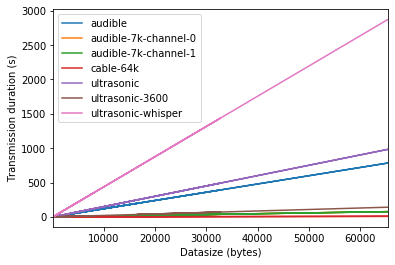

In [6]:
axs = df.groupby('profile')['duration'].plot(legend=True)
axs[0].set_xlabel("Datasize (bytes)")
axs[0].set_ylabel("Transmission duration (s)")

plt.savefig("quiet_durations.pdf")